In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
graph = nx.DiGraph()

In [ ]:
#types of graph:
#directed graph
#undirected graph

In [ ]:
graph.add_node('Bob')
graph.add_node('Smith')
graph.add_node('Roy')

In [ ]:
graph.add_edge('Bob','Smith')
graph.add_edge('Smith','Roy')
graph.add_edge('Smith','Bob')
graph.add_edge('Roy','Bob')

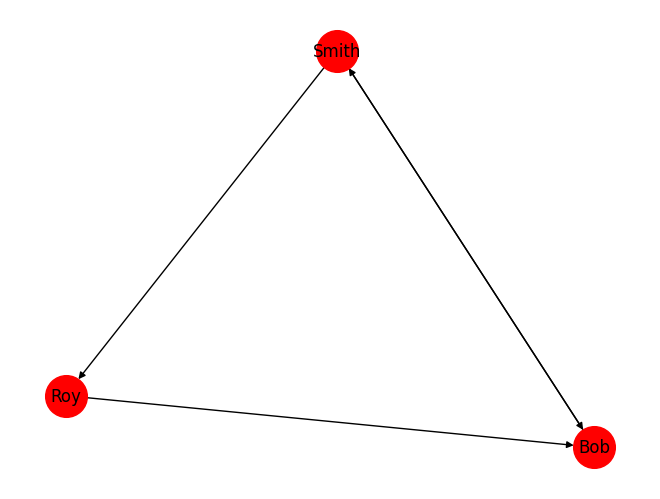

In [ ]:
nx.draw(graph,node_size=900,node_color='red',with_labels=True)

**Transportation example**

In [ ]:
graph=nx.Graph()

In [ ]:
graph.add_node('New York')
graph.add_node('Chicago')
graph.add_node('Los Angeles')
graph.add_node('Houston')

In [ ]:
graph.add_edge('New York','Chicago',weight=789)
graph.add_edge('Chicago','Los Angeles',weight=174)
graph.add_edge('Los Angeles','Houston',weight=1379)
graph.add_edge('Houston','New York',weight=1420)

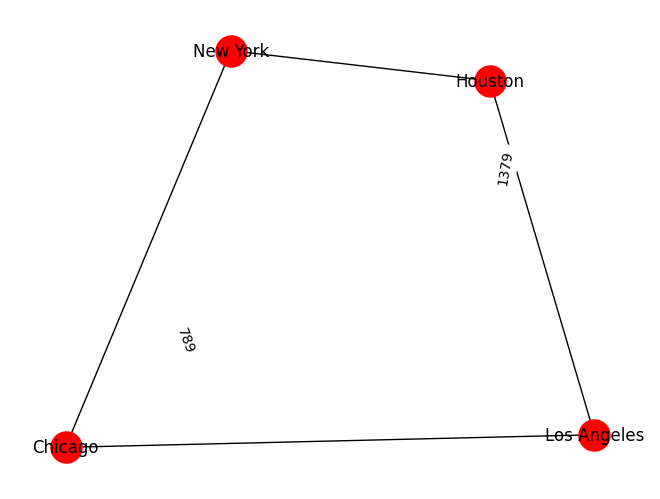

In [ ]:
nx.draw(graph,node_size=500,node_color='red',with_labels=True)
edge_labels=nx.get_edge_attributes(graph,'weight')
pos=nx.spectral_layout(graph)
nx.draw_networkx_edge_labels(graph,pos,edge_labels=edge_labels)
plt.show()

In [ ]:
paths=list(nx.all_pairs_shortest_path(graph))
paths

[('New York',
  {'New York': ['New York'],
   'Chicago': ['New York', 'Chicago'],
   'Houston': ['New York', 'Houston'],
   'Los Angeles': ['New York', 'Chicago', 'Los Angeles']}),
 ('Chicago',
  {'Chicago': ['Chicago'],
   'New York': ['Chicago', 'New York'],
   'Los Angeles': ['Chicago', 'Los Angeles'],
   'Houston': ['Chicago', 'New York', 'Houston']}),
 ('Los Angeles',
  {'Los Angeles': ['Los Angeles'],
   'Chicago': ['Los Angeles', 'Chicago'],
   'Houston': ['Los Angeles', 'Houston'],
   'New York': ['Los Angeles', 'Chicago', 'New York']}),
 ('Houston',
  {'Houston': ['Houston'],
   'Los Angeles': ['Houston', 'Los Angeles'],
   'New York': ['Houston', 'New York'],
   'Chicago': ['Houston', 'Los Angeles', 'Chicago']})]

**TV show Example**

In [ ]:
path='/content/drive/MyDrive/Colab Notebooks/Dataset/ga_edgelist.csv'

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv(path)

In [ ]:
df.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


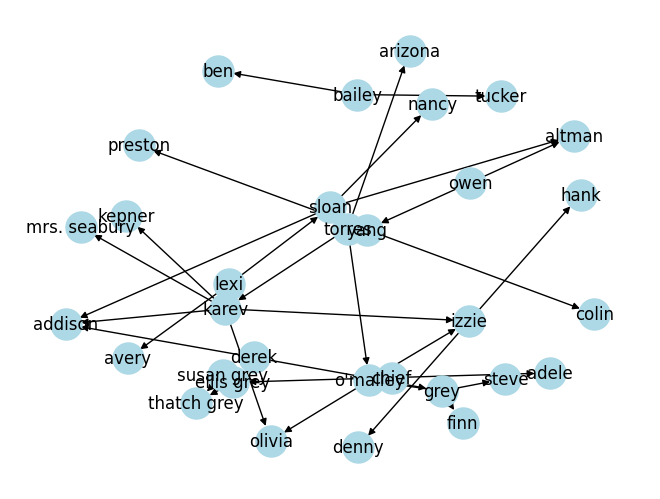

In [ ]:
graph=nx.from_pandas_edgelist(df,source='from',target='to',create_using=nx.DiGraph())
nx.draw(graph,pos=nx.spring_layout(graph),with_labels=True,node_size=500,node_color='lightblue')
plt.show()

In [ ]:
len(graph.nodes())

32

In [ ]:
len(graph.edges())

34

In [ ]:
graph.degree('grey')#how much connections does he establish

4

In [ ]:
deg=graph.degree()
deg

DiDegreeView({'lexi': 3, 'sloan': 5, 'karev': 7, 'owen': 2, 'yang': 3, 'altman': 2, 'torres': 4, 'arizona': 1, 'derek': 2, 'grey': 4, 'izzie': 4, "o'malley": 4, 'colin': 1, 'preston': 1, 'kepner': 1, 'addison': 3, 'nancy': 1, 'olivia': 2, 'mrs. seabury': 1, 'chief': 2, 'adele': 1, 'ellis grey': 2, 'thatch grey': 2, 'susan grey': 1, 'bailey': 2, 'tucker': 1, 'hank': 1, 'denny': 1, 'finn': 1, 'steve': 1, 'ben': 1, 'avery': 1})

In [ ]:
deg_df=pd.DataFrame(deg,columns=['Node','Degree'])
deg_df.head()

,Node,Degree
0,lexi,3
1,sloan,5
2,karev,7
3,owen,2
4,yang,3


In [ ]:
between=nx.betweenness_centrality(graph)
between

{'lexi': 0.0,
 'sloan': 0.005913978494623656,
 'karev': 0.016666666666666666,
 'owen': 0.0,
 'yang': 0.002150537634408602,
 'altman': 0.0,
 'torres': 0.011827956989247311,
 'arizona': 0.0,
 'derek': 0.0,
 'grey': 0.007526881720430107,
 'izzie': 0.015053763440860214,
 "o'malley": 0.012903225806451613,
 'colin': 0.0,
 'preston': 0.0,
 'kepner': 0.0,
 'addison': 0.0,
 'nancy': 0.0,
 'olivia': 0.0,
 'mrs. seabury': 0.0,
 'chief': 0.0,
 'adele': 0.0,
 'ellis grey': 0.001075268817204301,
 'thatch grey': 0.0,
 'susan grey': 0.0,
 'bailey': 0.0,
 'tucker': 0.0,
 'hank': 0.0,
 'denny': 0.0,
 'finn': 0.0,
 'steve': 0.0,
 'ben': 0.0,
 'avery': 0.0}

In [ ]:
df_between=pd.DataFrame(list(between.items()),columns=['Nodes','Betweenness'])
df_sorted=df_between.sort_values('Betweenness',ascending=False)
df_sorted.head()

,Nodes,Betweenness
2,karev,0.016667
10,izzie,0.015054
11,o'malley,0.012903
6,torres,0.011828
9,grey,0.007527


In [ ]:
eigen=nx.eigenvector_centrality_numpy(graph)
eigen

{'lexi': 1.773959095338579e-15,
 'sloan': 1.2945694725115989e-12,
 'karev': 6.763024300738065e-07,
 'owen': -4.7511158942847025e-15,
 'yang': -3.447040896718537e-12,
 'altman': 9.32256166099668e-10,
 'torres': 9.357124802668546e-10,
 'arizona': 6.763011425834978e-07,
 'derek': 1.9004611050960457e-15,
 'grey': 1.3728706498921407e-12,
 'izzie': 0.0009783330492740612,
 "o'malley": 6.772934336993057e-07,
 'colin': -2.4914875146662784e-09,
 'preston': -2.491480558013505e-09,
 'kepner': 0.0004888083928016945,
 'addison': 0.0004888093298892031,
 'nancy': 9.35703962383211e-10,
 'olivia': 0.0009783330492736636,
 'mrs. seabury': 0.0004888083928045139,
 'chief': 1.6677946968303012e-15,
 'adele': 1.2149179465959295e-12,
 'ellis grey': 1.2221017707903357e-12,
 'thatch grey': 8.858666243982325e-10,
 'susan grey': 3.4735772177322687e-15,
 'bailey': -5.0963507857127365e-15,
 'tucker': -3.660073817909718e-12,
 'hank': 0.7071058509606851,
 'denny': 0.7071058509606821,
 'finn': 9.922813610044602e-10,
 's

In [ ]:
df_eigen=pd.DataFrame(list(eigen.items()),columns=['Nodes','EigenVector'])
df_sorted_eigen=_eigen=df_eigen.sort_values('EigenVector',ascending=False)
df_sorted_eigen.head()

,Nodes,EigenVector
26,hank,0.707106
27,denny,0.707106
10,izzie,0.000978
17,olivia,0.000978
15,addison,0.000489


In [ ]:
combined=

In [ ]:
deg_df,df_sorted_between

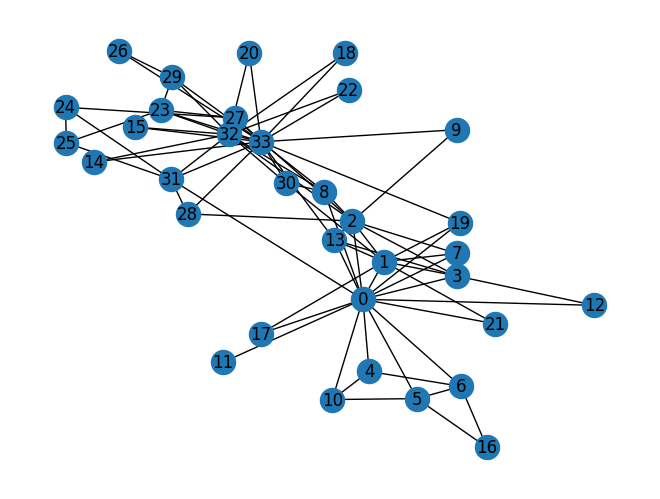

In [ ]:
graph=nx.karate_club_graph()
nx.draw(graph,with_labels=True)#degree,node,edge,betweenness,eigenvector,degree centrality-to do

In [ ]:
len(graph.nodes())

34

In [ ]:
len(graph.edges())

78

In [ ]:
deg=graph.degree()
deg

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [ ]:
deg_df=pd.DataFrame(deg,columns=['Node','Degree'])
deg_df.head()

,Node,Degree
0,0,16
1,1,9
2,2,10
3,3,6
4,4,3


In [ ]:
between=nx.betweenness_centrality(graph)
between

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [ ]:
df_between=pd.DataFrame(list(between.items()),columns=['Nodes','Betweenness'])
df_sorted=df_between.sort_values('Betweenness',ascending=False)
df_sorted.head()

,Nodes,Betweenness
0,0,0.437635
33,33,0.304075
32,32,0.145247
2,2,0.143657
31,31,0.138276


In [ ]:
eigen=nx.eigenvector_centrality_numpy(graph)
eigen

{0: 0.3554914445245668,
 1: 0.26595991955249193,
 2: 0.31719250448643166,
 3: 0.2111797203778903,
 4: 0.07596881818306893,
 5: 0.07948304511709944,
 6: 0.07948304511709947,
 7: 0.17095974804479633,
 8: 0.22740390712540012,
 9: 0.10267425072358624,
 10: 0.07596881818306897,
 11: 0.05285569749352132,
 12: 0.08425462871671376,
 13: 0.22647272014248132,
 14: 0.10140326218952454,
 15: 0.10140326218952456,
 16: 0.02363562810459137,
 17: 0.0923995381957026,
 18: 0.10140326218952457,
 19: 0.14791251029338753,
 20: 0.10140326218952453,
 21: 0.09239953819570262,
 22: 0.1014032621895246,
 23: 0.1501185718611528,
 24: 0.057052440541165636,
 25: 0.05920647491677846,
 26: 0.07557941348827209,
 27: 0.13347715338024008,
 28: 0.13107782298371085,
 29: 0.13496081926232775,
 30: 0.1747583023143528,
 31: 0.19103384140654367,
 32: 0.30864421979104695,
 33: 0.3733634702914832}

In [ ]:
df_eigen=pd.DataFrame(list(eigen.items()),columns=['Nodes','EigenVector'])
df_sorted_eigen=_eigen=df_eigen.sort_values('EigenVector',ascending=False)
df_sorted_eigen.head()

,Nodes,EigenVector
33,33,0.373363
0,0,0.355491
2,2,0.317193
32,32,0.308644
1,1,0.265960
